Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-n

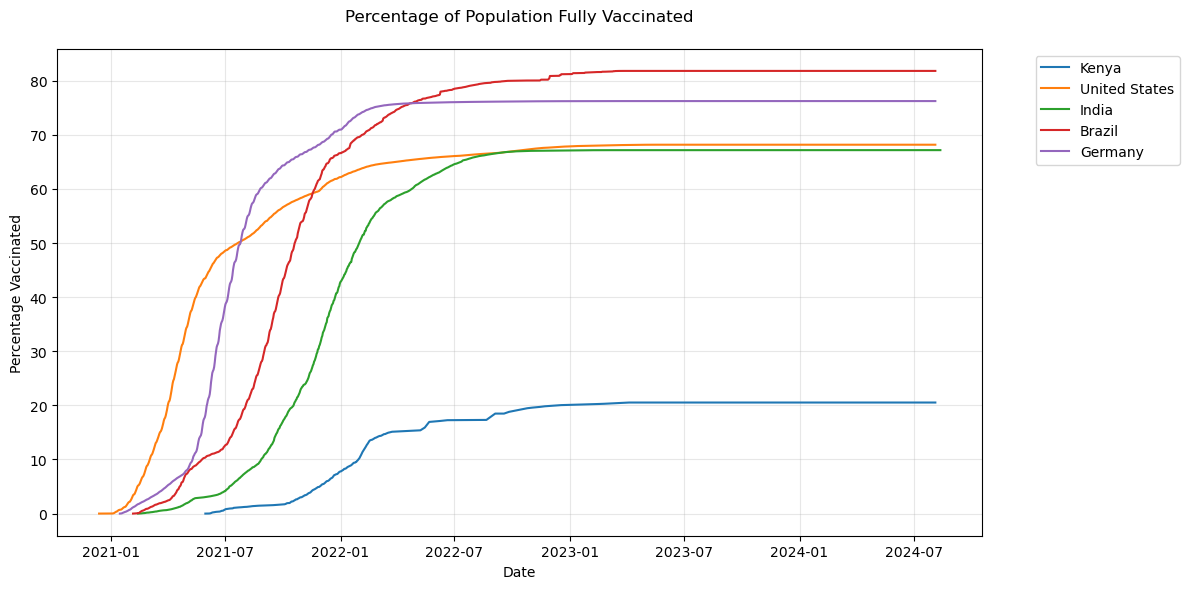

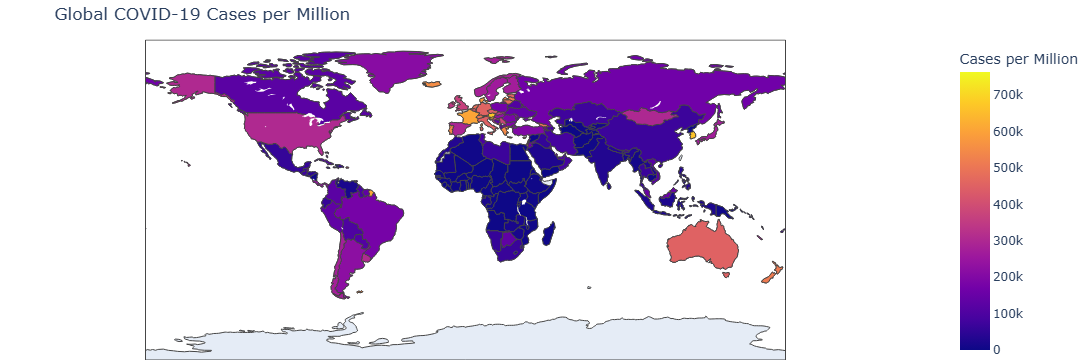

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv('owid-covid-data.csv')

print("Dataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe(include='all'))
print("\nMissing Values Count:")
print(df.isnull().sum())

df['date'] = pd.to_datetime(df['date'])

countries = ['Kenya', 'United States', 'India', 'Brazil', 'Germany']
columns = ['date', 'location', 'total_cases', 'new_cases', 'total_deaths', 
           'new_deaths', 'total_vaccinations', 'people_vaccinated', 
           'people_fully_vaccinated', 'population', 'iso_code']

df_clean = df[df['location'].isin(countries)][columns]

numeric_cols = ['total_cases', 'new_cases', 'total_deaths', 'new_deaths',
               'total_vaccinations', 'people_vaccinated', 
               'people_fully_vaccinated', 'population']
df_clean[numeric_cols] = df_clean[numeric_cols].apply(pd.to_numeric, errors='coerce')

df_clean[numeric_cols] = df_clean.groupby('location')[numeric_cols].transform(lambda x: x.interpolate())

plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_clean[df_clean['location'] == country].dropna(subset=['people_fully_vaccinated', 'population'])
    if not country_data.empty:
        plt.plot(country_data['date'], 
                country_data['people_fully_vaccinated'] / country_data['population'] * 100, 
                label=country)
plt.title('Percentage of Population Fully Vaccinated', pad=20)
plt.xlabel('Date')
plt.ylabel('Percentage Vaccinated')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

latest = df.sort_values('date').groupby('location', as_index=False).last()

if 'total_cases_per_million' in latest.columns and 'iso_code' in latest.columns:
    fig = px.choropleth(latest,
                       locations="iso_code",
                       color="total_cases_per_million",
                       hover_name="location",
                       hover_data=["total_cases", "population"],
                       color_continuous_scale=px.colors.sequential.Plasma,
                       title="Global COVID-19 Cases per Million",
                       labels={'total_cases_per_million': 'Cases per Million'})
    fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
    fig.show()
else:
    print("Required columns for choropleth not found. Available columns:", latest.columns.tolist())